In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Root-finding algorithms
   * Bisection method
   * Secant method
   * Newton's method

## Bisection method

We can implement the Bisection method for numerically solving the equation $f(x) = 0$ for the real variable $x$ when $f$ is a continuous function defined on a closed interval $[a, b]$ and where $f(a)$ and $f(b)$ have opposite signs.

In this case, by the intermediate value theorem, $f$ must have at least one root in the interval $(a, b)$.

In [1]:
def bisection(f,a,b,Nmax, TOL):
    # endpoint values a, b, 
    # tolerance TOL, 
    # maximum iterations NMAX
    
    if f(a)*f(b) >= 0:
        print("Bisection method is inapplicable .")
        return None
    
    # let c_n be a point in (a_n, b_n)
    Nmax=Nmax+1
    an=np.zeros(Nmax, dtype=float)
    bn=np.zeros(Nmax, dtype=float)
    cn=np.zeros(Nmax, dtype=float)
    fcn=np.zeros(Nmax, dtype=float)
    # initial values
    an[0]=a
    bn[0]=b

    for n in range(0,Nmax-1):
        cn[n]=(an[n] + bn[n])/2
        fcn[n]=f(cn[n])
        if f(an[n])*fcn[n] < 0:
            an[n+1]=an[n]
            bn[n+1]=cn[n]
        elif f(bn[n])*fcn[n] < 0:
            an[n+1]=cn[n]
            bn[n+1]=bn[n]
        else:
            print("Bisection method fails.")
            return None
        if (abs(fcn[n]) < TOL):
            print("We have found an exact solution.")
            return an, bn, cn, fcn, n
        n=n+1
    return an, bn, cn, fcn, n

**Example:** Finding the root of a polynomial.

Suppose that the bisection method is used to find a root of the polynomial
$$f(x)=x^{3}-x-2,$$
First, two numbers $a$ and $b$ have to be found such that $f(a)$ and $f(b)$ have opposite signs. Given

In [3]:
# defining function f using Lambdas
f = lambda x: x**3 - x - 2

For the above function,

In [4]:
a=1; f(a)

-2

and

In [5]:
b=2;f(b)

4

Now since $f(a)<0$ and $f(b)>0$, we can implement the method. Let $N_{max}=20$ and the tolerance be $10^{-4}$

In [6]:
Nmax=20; TOL=1e-4;
an, bn, cn, fcn, n = bisection(f,a,b,Nmax, TOL)

We have found an exact solution.


In [7]:
data_bisection = pd.DataFrame({'an': an[1:n+1], 'bn': bn[1:n+1], 'cn': cn[1:n+1], 'fcn': fcn[1:n+1]})

In [8]:
data_bisection

,an,bn,cn,fcn
0,1.500000,2.000000,1.750000,1.609375
1,1.500000,1.750000,1.625000,0.666016
2,1.500000,1.625000,1.562500,0.252197
3,1.500000,1.562500,1.531250,0.059113
4,1.500000,1.531250,1.515625,-0.034054
5,1.515625,1.531250,1.523438,0.012250
6,1.515625,1.523438,1.519531,-0.010971
7,1.519531,1.523438,1.521484,0.000622
8,1.519531,1.521484,1.520508,-0.005179
9,1.520508,1.521484,1.520996,-0.002279


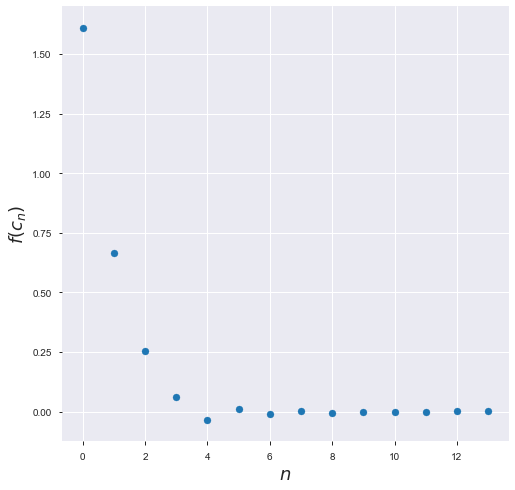

In [9]:
# Figure size is Figure size 800x800 with 1 Axes
plt.figure(figsize = (8, 8))
plt.scatter(list(range(0,n)),data_bisection.fcn)
plt.xlabel('$n$', fontsize=18)
plt.ylabel('$f(c_n)$', fontsize=18)
plt.show()

## Secant method

The secant method is defined as follows

$${\displaystyle x_{n}=x_{n-1}-f(x_{n-1}){\frac {x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}}={\frac {x_{n-2}f(x_{n-1})-x_{n-1}f(x_{n-2})}{f(x_{n-1})-f(x_{n-2})}}.}$$
As can be seen from the recurrence relation, the secant method requires two initial values, $x_0$ and $x_1$, which should ideally be chosen to lie close to the root.

In [11]:
def secant(f,a,b,Nmax,TOL):
    # endpoint values a, b, 
    # tolerance TOL, 
    # maximum iterations NMAX
    
    if f(a)*f(b) >= 0:
        print("Secant method is inapplicable.")
        return None
    Nmax=Nmax+1
    an=np.zeros(Nmax, dtype=float)
    bn=np.zeros(Nmax, dtype=float)
    cn=np.zeros(Nmax, dtype=float)
    fcn=np.zeros(Nmax, dtype=float)
    # initial values
    an[0]=a
    bn[0]=b
    for n in range(0,Nmax-1):
        cn[n]=  an[n] - f(an[n])*(bn[n] - an[n])/(f(bn[n]) - f(an[n]))
        fcn[n]=f(cn[n])
        if f(an[n])*fcn[n] < 0:
            an[n+1]=an[n]
            bn[n+1]=cn[n]
        elif f(bn[n])*fcn[n] < 0:
            an[n+1]=cn[n]
            bn[n+1]=bn[n]
        else:
            print("Secant method fails.")
            return None
        if abs(fcn[n]) < TOL:
            print("We have found an exact solution.")
            return an, bn, cn, fcn, n
    return an, bn, cn, fcn, n

**Example:** Let
$$f(x)=x^{3}-x-2,$$
and $N_{max}=20$ and the tolerance be $10^{-4}$. We have

In [12]:
f = lambda x: x**3 - x - 2
Nmax=20; TOL=1e-4;
an, bn, cn, fcn, n = secant(f,a,b,Nmax,TOL)

We have found an exact solution.


In [13]:
data_secant = pd.DataFrame({'an': an[1:n+1], 'bn': bn[1:n+1], 'cn': cn[1:n+1], 'fcn': fcn[1:n+1]})
data_secant

,an,bn,cn,fcn
0,1.333333,2.0,1.462687,-0.333339
1,1.462687,2.0,1.504019,-0.101818
2,1.504019,2.0,1.516331,-0.029895
3,1.516331,2.0,1.519919,-0.008675
4,1.519919,2.0,1.520957,-0.002509
5,1.520957,2.0,1.521258,-0.000725
6,1.521258,2.0,1.521344,-0.000209
7,1.521344,2.0,1.521370,-0.000060


In [14]:
n

8

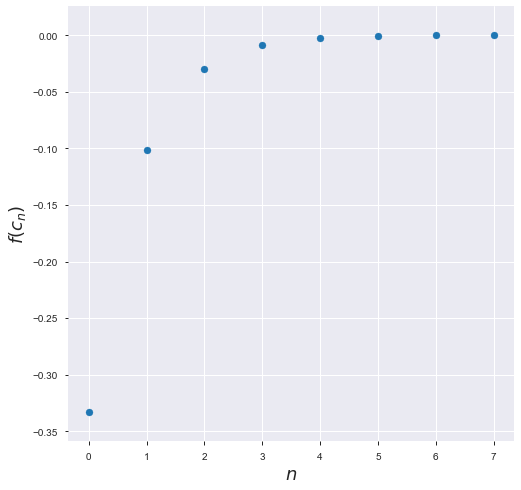

In [15]:
# Figure size is Figure size 800x800 with 1 Axes
plt.figure(figsize = (8, 8))
plt.scatter(list(range(0,n)),data_secant.fcn)
plt.xlabel('$n$', fontsize=18)
plt.ylabel('$f(c_n)$', fontsize=18)
plt.show()

## Newton's method

The process is repeated as

$${\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}\,}x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}\,$$

In [16]:
def newton(f,Df,x0,TOL,Nmax):
    # endpoint values a, b, 
    # tolerance TOL, 
    # maximum iterations NMAX
    xn=np.zeros(Nmax, dtype=float)
    fxn=np.zeros(Nmax, dtype=float)
    Dfxn=np.zeros(Nmax, dtype=float)
    xn[0] = x0
    for n in range(0,Nmax-1):
        fxn[n] = f(xn[n])
        if abs(fxn[n]) < TOL:
            print('Found a solution after',n,'iterations.')
            Dfxn[n] = Df(xn[n])
            return xn, fxn, Dfxn, n
        Dfxn[n] = Df(xn[n])
        if Dfxn[n] == 0:
            print('Zero derivative. No solution found.')
            return None
        xn[n+1] = xn[n] - fxn[n]/Dfxn[n]
    print('Exceeded maximum iterations. No solution found.')
    return None

**Example:** Let
$$f(x)=x^{3}-x-2,$$
and $N_{max}=20$ and the tolerance be $10^{-4}$. We have

In [17]:
f = lambda x: x**3 - x - 2
Df = lambda x: 3*x**(2)-1
Nmax=20; TOL=1e-4;
xn, fxn, Dfxn, n= newton(f,Df,1,TOL,Nmax)

Found a solution after 5 iterations.


In [18]:
data_newton = pd.DataFrame({'xn': xn[1:n+1], 'fxn': fxn[1:n+1], 'Dfxn': Dfxn[1:n+1]})
data_newton

,xn,fxn,Dfxn
0,2.000000,4.000000e+00,11.000000
1,1.636364,7.453043e-01,7.033058
2,1.530392,5.393892e-02,6.026299
3,1.521441,3.670959e-04,5.944352
4,1.521380,1.740686e-08,5.943789


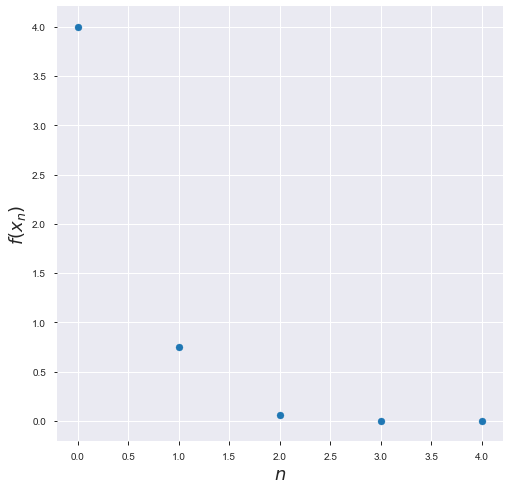

In [19]:
# Figure size is Figure size 800x800 with 1 Axes
plt.figure(figsize = (8, 8))
plt.scatter(list(range(0,n)),data_newton.fxn[0:n])
plt.xlabel('$n$', fontsize=18)
plt.ylabel('$f(x_n)$', fontsize=18)
plt.show()